In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

load data generated in curve.py(curve.ipynb)

In [426]:
index = pd.read_csv('420100_move_out_index_2020.csv',index_col=0)

In [427]:
per_index = 500/index.iloc[0].sum()

In [428]:
index = index.iloc[:,0:24]

load data generated in percent.py(percent.ipynb)

In [429]:
move_out = pd.read_csv('provincerank_move_out.csv',index_col=0)

In [430]:
move_out.set_index('rank',inplace=True)

In [431]:
list_ = list(index.iloc[0])

In [432]:
move_out = move_out.mul(list_)

calculate total migration number

In [433]:
move_out['total'] = move_out.sum(axis = 1) * per_index * 10000

In [434]:
infect = pd.read_csv('province_infected.csv',index_col=0)

In [435]:
move_out['state'] = move_out.index
move_out['state'] = move_out['state'].map(lambda num : num[0:2])

In [436]:
infect['state'] = infect.index
infect['state'] = infect['state'].map(lambda num : num[0:2])

In [437]:
move_out = move_out.reset_index()

merge two dataframes:
total: migration number
value: infected number

In [438]:
move_out = pd.merge(move_out, infect, how = 'inner', on = 'state')

In [439]:
move_out = move_out.sort_values(by='value',ascending=False)

In [440]:
move_out.set_index('rank',inplace=True)
move_out = move_out.reset_index()

Text(0, 0.5, 'infected number')

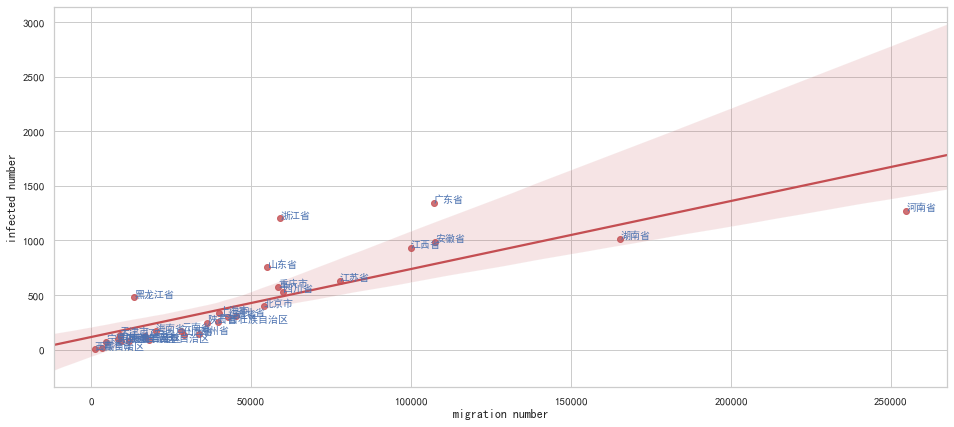

In [476]:
sns.set(font_scale = 1, color_codes = True)
sns.set_style("whitegrid", {"font.sans-serif":['simhei', 'Arial']})
plt.figure(figsize=(16,7))
sns.regplot(x='total',y='value',data=move_out[1:], color = 'r')
for i in range(1,move_out.shape[0]):
    x = move_out['total'][i]
    y = move_out['value'][i]
    t = move_out['rank'][i]
    plt.text(x+0.2, y+0.3, t,horizontalalignment='left', size='small', color='b', weight='semibold')
plt.xlabel('migration number')
plt.ylabel('infected number')

move outliner :
0      湖北省
1      广东省
2      河南省
3      浙江省
4      湖南省
7      山东省
11    黑龙江省

In [492]:
outliner_ = move_out.drop([0,1,2,3,4,7,11],axis=0)
outliner_ = outliner_.reset_index()

In [514]:
x = outliner_['total']
y = outliner_['value']
a, b = np.polyfit(x,y,1)
print('slope: ',a)
print('intercept: ',b)

slope:  0.009037113249057815
intercept:  -38.64310886683868


Text(0.5, 1.0, 'y = 0.00903 * x - 38.64')

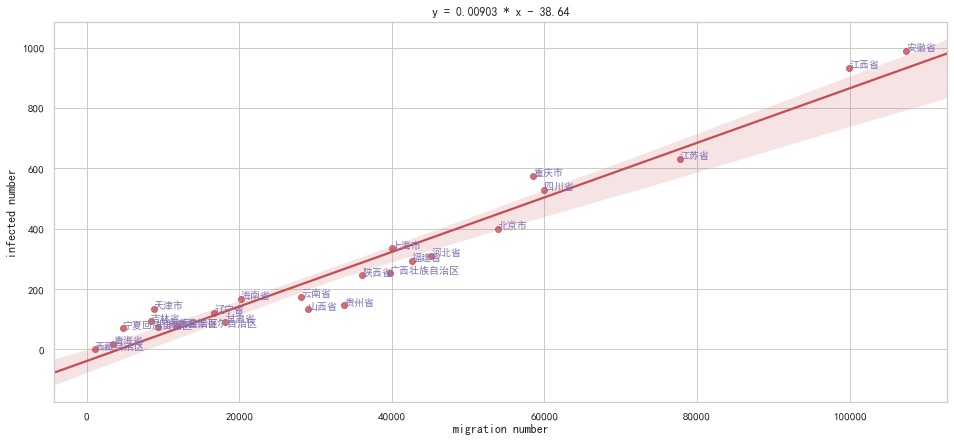

In [512]:
plt.figure(figsize=(16,7))
sns.regplot(x='total',y='value',data=outliner_, color = 'r')
for i in range(0,outliner_.shape[0]):
    x = outliner_['total'][i]
    y = outliner_['value'][i]
    t = outliner_['rank'][i]
    plt.text(x+0.2, y+0.3, t,horizontalalignment='left', size='small', color='m', weight='semibold')
plt.xlabel('migration number')
plt.ylabel('infected number')
plt.title('y = 0.00903 * x - 38.64')

In [518]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = outliner_[['total']]
y = outliner_['value']
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [519]:
model.coef_

array([0.00903711])

In [520]:
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(model.predict(X), y))

r2_score:  0.9515702384152012
